# Basic Idea

In [1]:
from numpy import meshgrid, sqrt, Inf
from numpy.random import random

# make some random coordinates
n = 5
x = random((n,))
y = random((n,))

print x
print y

[ 0.97030255  0.66277932  0.5840624   0.63731361  0.84334683]
[ 0.32279599  0.70592571  0.61285159  0.81026744  0.45476207]


In [2]:
# compare X coordinates
X1,X2 = meshgrid(x,x)
DX = X1-X2
print X1
print
print X2
print
print DX

[[ 0.97030255  0.66277932  0.5840624   0.63731361  0.84334683]
 [ 0.97030255  0.66277932  0.5840624   0.63731361  0.84334683]
 [ 0.97030255  0.66277932  0.5840624   0.63731361  0.84334683]
 [ 0.97030255  0.66277932  0.5840624   0.63731361  0.84334683]
 [ 0.97030255  0.66277932  0.5840624   0.63731361  0.84334683]]

[[ 0.97030255  0.97030255  0.97030255  0.97030255  0.97030255]
 [ 0.66277932  0.66277932  0.66277932  0.66277932  0.66277932]
 [ 0.5840624   0.5840624   0.5840624   0.5840624   0.5840624 ]
 [ 0.63731361  0.63731361  0.63731361  0.63731361  0.63731361]
 [ 0.84334683  0.84334683  0.84334683  0.84334683  0.84334683]]

[[ 0.         -0.30752323 -0.38624014 -0.33298894 -0.12695572]
 [ 0.30752323  0.         -0.07871692 -0.02546571  0.18056751]
 [ 0.38624014  0.07871692  0.          0.05325121  0.25928443]
 [ 0.33298894  0.02546571 -0.05325121  0.          0.20603322]
 [ 0.12695572 -0.18056751 -0.25928443 -0.20603322  0.        ]]


In [3]:
# compare Y coordinates
Y1,Y2 = meshgrid(y,y)
DY = Y1-Y2
print Y1
print
print Y2
print
print DY

[[ 0.32279599  0.70592571  0.61285159  0.81026744  0.45476207]
 [ 0.32279599  0.70592571  0.61285159  0.81026744  0.45476207]
 [ 0.32279599  0.70592571  0.61285159  0.81026744  0.45476207]
 [ 0.32279599  0.70592571  0.61285159  0.81026744  0.45476207]
 [ 0.32279599  0.70592571  0.61285159  0.81026744  0.45476207]]

[[ 0.32279599  0.32279599  0.32279599  0.32279599  0.32279599]
 [ 0.70592571  0.70592571  0.70592571  0.70592571  0.70592571]
 [ 0.61285159  0.61285159  0.61285159  0.61285159  0.61285159]
 [ 0.81026744  0.81026744  0.81026744  0.81026744  0.81026744]
 [ 0.45476207  0.45476207  0.45476207  0.45476207  0.45476207]]

[[ 0.          0.38312972  0.2900556   0.48747145  0.13196607]
 [-0.38312972  0.         -0.09307412  0.10434173 -0.25116365]
 [-0.2900556   0.09307412  0.          0.19741585 -0.15808953]
 [-0.48747145 -0.10434173 -0.19741585  0.         -0.35550537]
 [-0.13196607  0.25116365  0.15808953  0.35550537  0.        ]]


In [4]:
# compute the distances between pairs of points
D = sqrt( DX**2 + DY**2 )
print D

[[ 0.          0.49128293  0.48302557  0.59034739  0.18311963]
 [ 0.49128293  0.          0.12189809  0.10740437  0.30933445]
 [ 0.48302557  0.12189809  0.          0.20447178  0.30367863]
 [ 0.59034739  0.10740437  0.20447178  0.          0.41089385]
 [ 0.18311963  0.30933445  0.30367863  0.41089385  0.        ]]


In [5]:
# create some indices to work with
I,J = meshgrid( range(n), range(n) )
print I
print
print J

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [6]:
# D contains duplicate information, remove the lower part from consideration
D[I<=J] = Inf

print D

[[        inf  0.49128293  0.48302557  0.59034739  0.18311963]
 [        inf         inf  0.12189809  0.10740437  0.30933445]
 [        inf         inf         inf  0.20447178  0.30367863]
 [        inf         inf         inf         inf  0.41089385]
 [        inf         inf         inf         inf         inf]]


In [7]:
# find indices of close points and prepare edges
r = 0.25
ind = D < r
edges = zip( I[ind], J[ind] )
print edges

[(4, 0), (2, 1), (3, 1), (3, 2)]


# In Action

In [8]:
%matplotlib inline
from numpy import meshgrid, sqrt, Inf
from numpy.random import random
from networkx import Graph, draw
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)

In [9]:
# graph parameters
n = 100
r = 0.1

# make some random coordinates
x = random((n,))
y = random((n,))

# compare X coordinates
X1,X2 = meshgrid(x,x)
DX = X1-X2

# compare Y coordinates
Y1,Y2 = meshgrid(y,y)
DY = Y1-Y2

# compute the distances between pairs of points
D = sqrt( DX**2 + DY**2 )

# create some indices to work with
I,J = meshgrid( range(n), range(n) )

# D contains duplicate information, remove the lower part from consideration
D[I<=J] = Inf

# find indices of close points and prepare edges
ind = D < r
edges = zip( I[ind], J[ind] )

# create a graph
G = Graph()

# add the nodes
G.add_nodes_from( xrange(n) )

# add the edges
G.add_edges_from( edges )

# set up position dictionary for plotting
pos = dict( zip( xrange(n), zip( list(x), list(y) ) ) )

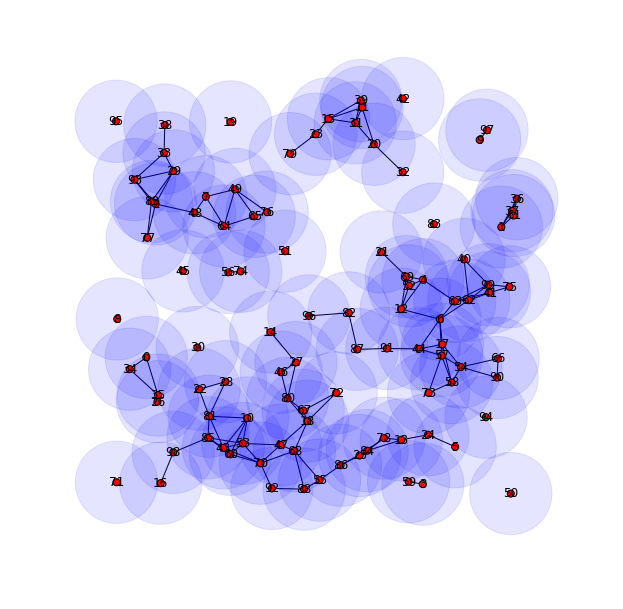

In [10]:
# draw the graph
draw(G,pos,node_size=50)

plot_circles = True

if plot_circles:
    for node in G.nodes_iter():
        c = plt.Circle(pos[node],r,color='b',alpha=0.1)
        plt.gca().add_artist(c)